In [29]:
from utils import *
from dataset import *
from autoencoder import *
import pandas as pd

Ashley = False
if Ashley:
    device = "cpu"
else:
    device = "cuda"

In [30]:
#### Load true and false flares data
# Load dataframes
true_flares_df = pd.read_csv('Chandra_data/trueflares.csv')
false_flares_df = pd.read_csv('Chandra_data/falseflares.csv')
true_flares_df = true_flares_df[['time','energy','obsreg_id']]
false_flares_df = false_flares_df[['time','energy','obsreg_id']]

# Convert to data dictionary
d = true_flares_df.groupby('obsreg_id').apply(lambda group: np.array(group[['time', 'energy']])).to_dict()
d.update(false_flares_df.groupby('obsreg_id').apply(lambda group: np.array(group[['time', 'energy']])).to_dict())

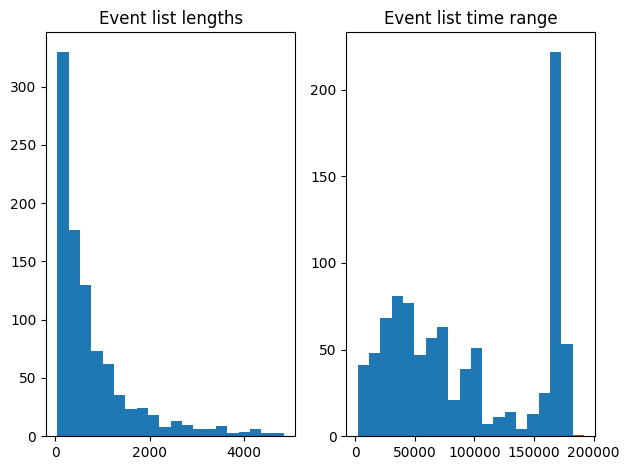

In [46]:
#### Drop outliers for now and visualize summary distributions
lengths = []
Ts = []
data_dict = {}
length_threshold = 5000
T_threshold = 250000
for key in list(d.keys()):
    length = len(d[key])
    T = max(d[key][:,0]) - min(d[key][:,0])
    if length > length_threshold or T > T_threshold:
        continue
    else:
        lengths.append(length)
        Ts.append(T)
        data_dict[key] = d[key]
lengths = np.array(lengths)
Ts = np.array(Ts)

fig, ax = plt.subplots(1,2)
ax[0].hist(lengths,bins=20);
ax[0].set_title('Event list lengths')

ax[1].hist(Ts,bins=20);
ax[1].set_title('Event list time range')
plt.tight_layout()

In [47]:
len(data_dict)

943

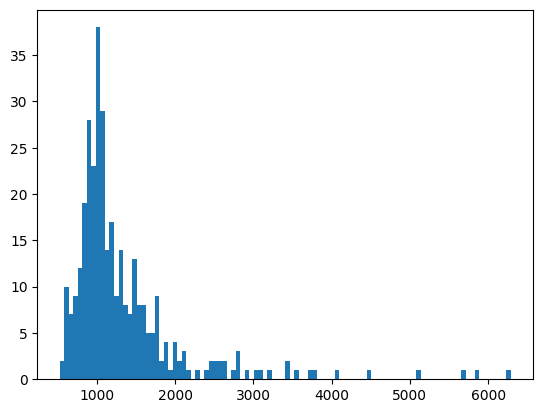

In [71]:
ind = 6
dic = false_dict
event_list = dic[list(dic.keys())[ind]]
# event_list = event_list[:,1] - min(event_list[:,0])
plt.hist(event_list[:,1],bins=100);